In [1]:
%matplotlib inline

import numpy as np
import matplotlib.pyplot as plt
import astropy.units as u
from astropy.coordinates import Angle

import asyncio

from lsst.ts.salobj import Remote, State

import SALPY_ATPtg
import SALPY_ATMCS

In [2]:
atptg = Remote(SALPY_ATPtg)
atmcs = Remote(SALPY_ATMCS)

In [18]:
class LivePlot:
    def __init__(self):
#         self.fig = plt.figure()
#         self.ax1 = self.fig.add_subplot(111)

#         plt.ion()    
        self.az = np.array([])
        self.el = np.array([])
        self.demandRot = np.array([])
        
        self.azimuthCalculatedAngle = np.array([])
        self.elevationCalculatedAngle = np.array([])
        self.nasmyth1CalculatedAngle = np.array([])
        self.nasmyth2CalculatedAngle = np.array([])
        
    def atptg_callback(self, id_data):
        self.az = np.append(self.az, Angle(id_data.demandAz, unit=u.deg).deg)
        self.el = np.append(self.el, Angle(id_data.demandEl, unit=u.deg).deg)
        self.demandRot = np.append(self.demandRot, Angle(id_data.demandRot, unit=u.deg).deg)

    def atmcs_callback(self, id_data):
        self.azimuthCalculatedAngle   = np.append(self.azimuthCalculatedAngle, id_data.azimuthCalculatedAngle)
        self.elevationCalculatedAngle = np.append(self.elevationCalculatedAngle, id_data.elevationCalculatedAngle)
        self.nasmyth1CalculatedAngle  = np.append(self.nasmyth1CalculatedAngle, id_data.nasmyth1CalculatedAngle)
        self.nasmyth2CalculatedAngle  = np.append(self.nasmyth2CalculatedAngle, id_data.nasmyth2CalculatedAngle)

        

In [19]:
live_plot = LivePlot()

In [20]:
atptg.tel_currentTargetStatus.callback = live_plot.atptg_callback
atmcs.tel_mountEncoders.callback = live_plot.atmcs_callback

In [21]:
asyncio.get_event_loop().run_forever()

KeyboardInterrupt: 

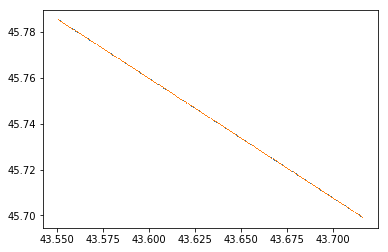

In [23]:
plt.plot(live_plot.az,live_plot.el,',') 
plt.plot(live_plot.azimuthCalculatedAngle,live_plot.elevationCalculatedAngle,',') 


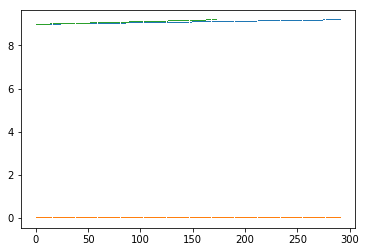

In [22]:
plt.plot(live_plot.nasmyth1CalculatedAngle, ',') 
plt.plot(live_plot.nasmyth2CalculatedAngle, ',')
plt.plot(live_plot.demandRot, ',')

In [15]:
live_plot.nasmyth1CalculatedAngle

array([72.16028354, 72.16028354, 72.16028354, ..., 10.9275329 ,
       10.92826977, 10.92910893])

In [ ]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='polar')
ax.set_theta_zero_location('W', offset=0)
c = ax.scatter(np.radians(live_plot.az), 90.-live_plot.el)

In [ ]:
fig = plt.figure()

In [ ]:
ax = fig.add_subplot(111, projection='polar')

In [ ]:
c = ax.scatter(np.linspace(0., np.pi, 10),np.zeros(10)+0.5)

In [ ]:
fig.show()

In [ ]:
c = plt.plot(np.linspace(0., np.pi, 10),np.zeros(10)+0.5)

In [ ]:
c[0].figure

In [ ]:
smyth2RotatorAngleVelocity : 0
    time : 1.55632e+09
    trackId : 0
=== [issueCommand_trackTarget] writing a command containing :
    device :
    property :
    action :
    itemValue :
    azimuth : 42.7826
    azimuthVelocity : -0.0048636
    elevation : 46.1777
    elevationVelocity : 0.00245055
    nasmyth1RotatorAngle : 370.178
    nasmyth1RotatorAngleVelocity : 0.00627552
    nasmyth2RotatorAngle : 0
    nasmyth2RotatorAngleVelocity : 0
    time : 1.55632e+09
    trackId : 0
=== [putSample] ATPtg::currentTargetStatus_c3e181d6 writing a message containing :
    revCode  : c3e181d6
=== [putSample] ATPtg::mountStatus_b8ea16a8 writing a message containing :
    revCode  : b8ea16a8
=== [putSample] ATPtg::guidingAndOffsets_fd72d243 writing a message containing :
    revCode  : fd72d243
=== [putSample] ATPtg::currentTimesToLimits_b64b877e writing a message containing :